In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('insurance.csv')

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [3]:
# 1338 rows, 7 columns
df.shape

(1338, 7)

In [4]:
# Column types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# Means, quartiles, mins, maxes, and stds
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Null value counts
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Look at continuous feature histograms before outliers removed

<AxesSubplot: >

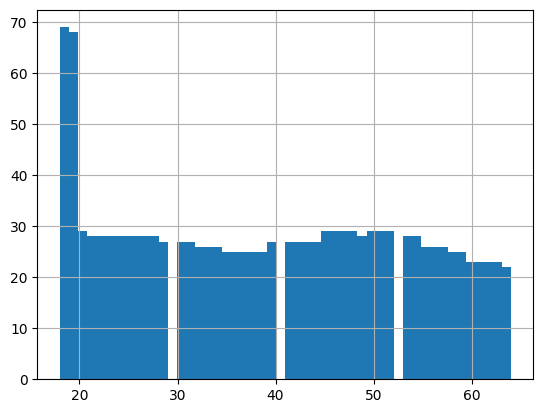

In [8]:
df['age'].hist(bins=50)

<AxesSubplot: >

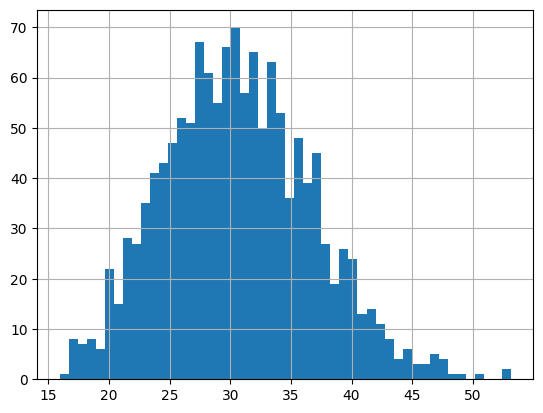

In [9]:
df['bmi'].hist(bins=50)

<AxesSubplot: >

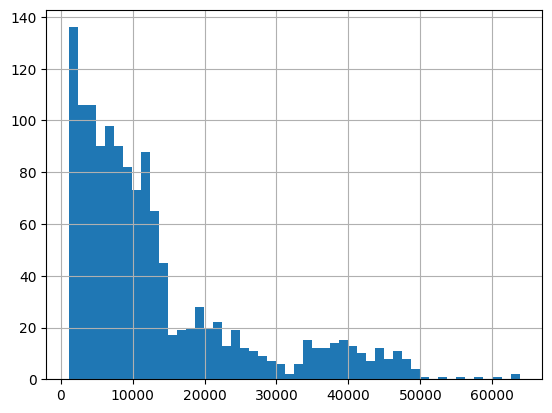

In [10]:
df['charges'].hist(bins=50)

In [11]:
# Calculate the z-score for each continuous feature and target
z_age = np.abs(stats.zscore(df['age']))
z_bmi = np.abs(stats.zscore(df['bmi']))
z_charges = np.abs(stats.zscore(df['charges']))

In [12]:
# Identify outliers as features with a z-score greater than 3
threshold = 3
outliers_age = df[z_age > threshold]
outliers_bmi = df[z_bmi > threshold]
outliers_charges = df[z_charges > threshold]

In [13]:
# Print the outliers
print(outliers_age.age)

Series([], Name: age, dtype: int64)


In [14]:
# Print the outliers
print(outliers_bmi.bmi)

116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64


In [15]:
# Print the outliers
print(outliers_charges.charges)

34      51194.55914
543     63770.42801
577     58571.07448
819     55135.40209
1146    52590.82939
1230    60021.39897
1300    62592.87309
Name: charges, dtype: float64


In [16]:
# Drop outliers
df.drop(outliers_age.index, inplace=True)
df.drop(outliers_bmi.index, inplace=True)
df.drop(outliers_charges.index, inplace=True)

In [17]:
# Look at continous feature histograms after outliers removed

<AxesSubplot: >

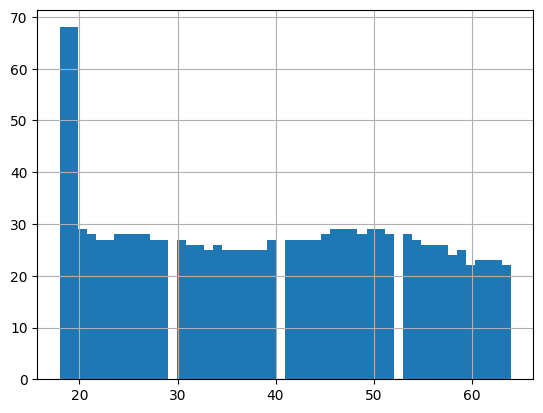

In [18]:
df['age'].hist(bins=50)

<AxesSubplot: >

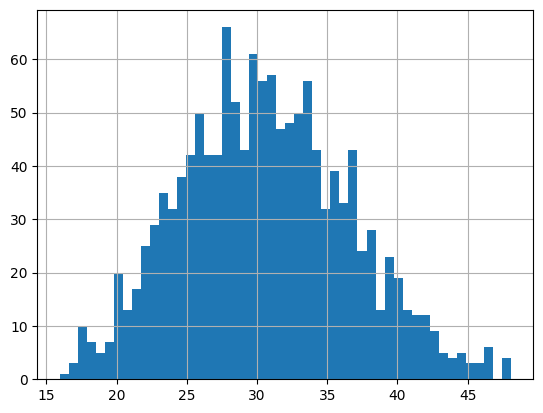

In [19]:
df['bmi'].hist(bins=50)

<AxesSubplot: >

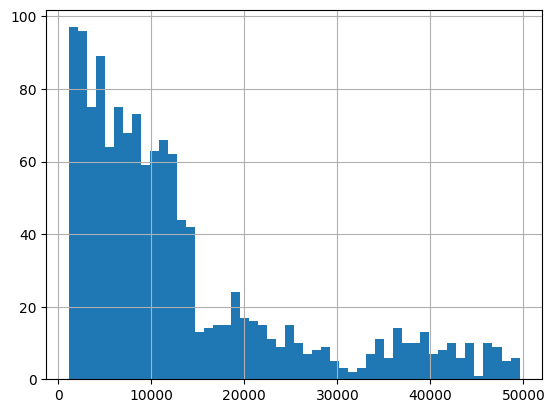

In [20]:
df['charges'].hist(bins=50)

# Transform: sex

In [21]:
df.sex.value_counts()

male      668
female    659
Name: sex, dtype: int64

In [22]:
df.sex.value_counts()/df.shape[0]

male      0.503391
female    0.496609
Name: sex, dtype: float64

In [23]:
df['sex_encoded'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df.sex_encoded

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex_encoded, Length: 1327, dtype: int64

# Transform: smoker

In [24]:
df.smoker.value_counts()

no     1061
yes     266
Name: smoker, dtype: int64

In [25]:
df.smoker.value_counts()/df.shape[0]

no     0.799548
yes    0.200452
Name: smoker, dtype: float64

In [26]:
df['smoker_encoded'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
df.smoker_encoded

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker_encoded, Length: 1327, dtype: int64

# Transform: region

In [27]:
df.region.value_counts()

southeast    358
southwest    323
northwest    323
northeast    323
Name: region, dtype: int64

In [28]:
df.region.value_counts()/df.shape[0]

southeast    0.269781
southwest    0.243406
northwest    0.243406
northeast    0.243406
Name: region, dtype: float64

In [29]:
# Map strings to encoded values
mapping_dict = {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
df['region_encoded'] = df['region'].map(mapping_dict)
df.region_encoded

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region_encoded, Length: 1327, dtype: int64

# Create with and without target datasets and save them as CSVs

In [30]:
df_with_target = df.copy()
df_with_target.to_csv('df_with_target.csv', index=False)

df_without_target = df.copy()
df_without_target.drop(columns=['charges'], inplace=True)
df_without_target.to_csv('df_without_target.csv', index=False)

In [31]:
df_with_target

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


In [32]:
df_without_target

,age,sex,bmi,children,smoker,region,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,0,1,3
1,18,male,33.770,1,no,southeast,1,0,2
2,28,male,33.000,3,no,southeast,1,0,2
3,33,male,22.705,0,no,northwest,1,0,1
4,32,male,28.880,0,no,northwest,1,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,1,0,1
1334,18,female,31.920,0,no,northeast,0,0,0
1335,18,female,36.850,0,no,southeast,0,0,2
1336,21,female,25.800,0,no,southwest,0,0,3
